In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/kc_house_data.csv')

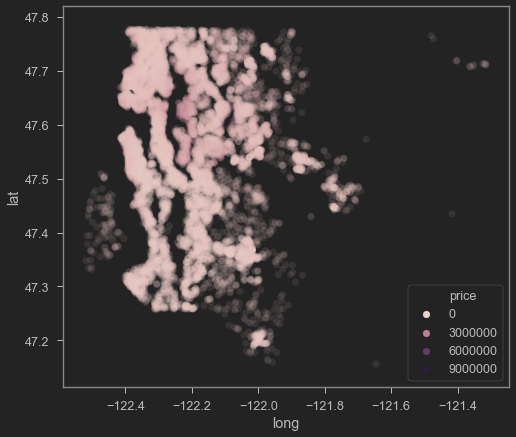

In [3]:
sns.scatterplot(x='long',y='lat',data=df,hue='price',edgecolor='None',alpha=0.1)

In [4]:
df.head(1).count()

id               1
date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [5]:
df.head(1).count()

df = df.drop(['zipcode','id'],axis=1)

In [6]:
df.head(1).count()
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [8]:
df = df.drop('date',axis=1)

In [14]:
df2=df.sort_values('price',ascending=False).iloc[300:]

In [15]:
#sns.scatterplot(x='long',y='lat',data=df2,edgecolor='None',alpha=0.1,hue='price',palette='RdYlGn')
df2.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
17393,1800000.0,5,3.25,3890,20005,1.0,0,0,3,10,2260,1630,1977,0,47.6312,-122.224,3450,20176,2015,3


In [16]:
x = df2.drop('price',axis=1).values
y = df2['price'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential

C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\riaz\.conda\envs\python-cvcourse\lib\site-pack

In [23]:
from tensorflow.keras.layers import Dense

In [24]:
X_train.shape

(14907, 19)

In [25]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=800)

Train on 14907 samples, validate on 6390 samples
Epoch 1/800
14907/14907 [==============================] - 1s 68us/step - loss: 19106097930.8363 - val_loss: 19509969863.9124
Epoch 2/800
14907/14907 [==============================] - 0s 17us/step - loss: 19118819470.6058 - val_loss: 19460112601.2995
Epoch 3/800
14907/14907 [==============================] - 0s 17us/step - loss: 19102543154.4375 - val_loss: 19475346488.0876
Epoch 4/800
14907/14907 [==============================] - 0s 18us/step - loss: 19100677200.4390 - val_loss: 19469826785.7928
Epoch 5/800
14907/14907 [==============================] - 0s 20us/step - loss: 19102023245.6569 - val_loss: 19518420746.4964
Epoch 6/800
14907/14907 [==============================] - 0s 20us/step - loss: 19112765515.2870 - val_loss: 19456246387.5405
Epoch 7/800
14907/14907 [==============================] - 0s 20us/step - loss: 19092768409.4248 - val_loss: 19466696439.9074
Epoch 8/800
14907/14907 [==============================] - 0s 19us/st

Epoch 65/800
14907/14907 [==============================] - 0s 16us/step - loss: 19046924708.1924 - val_loss: 19440143511.5969
Epoch 66/800
14907/14907 [==============================] - 0s 19us/step - loss: 19022549348.3083 - val_loss: 19418378005.3934
Epoch 67/800
14907/14907 [==============================] - 0s 19us/step - loss: 19015353425.2633 - val_loss: 19391334365.3859
Epoch 68/800
14907/14907 [==============================] - 0s 19us/step - loss: 19016558295.8664 - val_loss: 19395756751.8448
Epoch 69/800
14907/14907 [==============================] - 0s 19us/step - loss: 19020395794.2894 - val_loss: 19387305313.5124
Epoch 70/800
14907/14907 [==============================] - 0s 18us/step - loss: 19025851533.8501 - val_loss: 19400547752.0225
Epoch 71/800
14907/14907 [==============================] - 0s 19us/step - loss: 19025235256.4138 - val_loss: 19421272153.0992
Epoch 72/800
14907/14907 [==============================] - 0s 16us/step - loss: 19026853236.8632 - val_loss: 1

Epoch 129/800
14907/14907 [==============================] - 0s 15us/step - loss: 18955243664.6665 - val_loss: 19331063161.8704
Epoch 130/800
14907/14907 [==============================] - 0s 16us/step - loss: 18934666757.8045 - val_loss: 19344273133.0103
Epoch 131/800
14907/14907 [==============================] - 0s 18us/step - loss: 18928626337.7366 - val_loss: 19323769286.4701
Epoch 132/800
14907/14907 [==============================] - 0s 18us/step - loss: 18926574287.7607 - val_loss: 19322299521.8028
Epoch 133/800
14907/14907 [==============================] - 0s 19us/step - loss: 18924656992.0494 - val_loss: 19330455846.8607
Epoch 134/800
14907/14907 [==============================] - 0s 19us/step - loss: 18934228747.5919 - val_loss: 19319645177.9105
Epoch 135/800
14907/14907 [==============================] - 0s 17us/step - loss: 18929633384.6875 - val_loss: 19321616500.6623
Epoch 136/800
14907/14907 [==============================] - 0s 20us/step - loss: 18935535328.3156 - val

Epoch 193/800
14907/14907 [==============================] - 0s 17us/step - loss: 18843431684.9287 - val_loss: 19269354559.7797
Epoch 194/800
14907/14907 [==============================] - 0s 16us/step - loss: 18847203769.2123 - val_loss: 19284785582.1120
Epoch 195/800
14907/14907 [==============================] - 0s 18us/step - loss: 18858643647.3775 - val_loss: 19285563129.8304
Epoch 196/800
14907/14907 [==============================] - 0s 18us/step - loss: 18848940528.5098 - val_loss: 19260657431.9574
Epoch 197/800
14907/14907 [==============================] - 0s 18us/step - loss: 18848610134.5354 - val_loss: 19254499416.4582
Epoch 198/800
14907/14907 [==============================] - 0s 19us/step - loss: 18847167231.0211 - val_loss: 19304160068.5070
Epoch 199/800
14907/14907 [==============================] - 0s 17us/step - loss: 18856226326.2220 - val_loss: 19257499113.4047
Epoch 200/800
14907/14907 [==============================] - 0s 18us/step - loss: 18842967206.8542 - val

14907/14907 [==============================] - 0s 15us/step - loss: 18757300868.6110 - val_loss: 19250460981.6038
Epoch 257/800
14907/14907 [==============================] - 0s 17us/step - loss: 18750276465.0508 - val_loss: 19187623093.0829
Epoch 258/800
14907/14907 [==============================] - 0s 16us/step - loss: 18749790541.4337 - val_loss: 19208691591.4917
Epoch 259/800
14907/14907 [==============================] - 0s 18us/step - loss: 18750330722.9688 - val_loss: 19205759274.7067
Epoch 260/800
14907/14907 [==============================] - 0s 19us/step - loss: 18757804233.1318 - val_loss: 19188723026.1283
Epoch 261/800
14907/14907 [==============================] - 0s 19us/step - loss: 18746728135.7236 - val_loss: 19200720433.8379
Epoch 262/800
14907/14907 [==============================] - 0s 20us/step - loss: 18746084510.1990 - val_loss: 19181764991.3189
Epoch 263/800
14907/14907 [==============================] - 0s 18us/step - loss: 18749653372.9689 - val_loss: 1920209

14907/14907 [==============================] - 0s 20us/step - loss: 18639586129.7270 - val_loss: 19093247057.7277
Epoch 321/800
14907/14907 [==============================] - 0s 20us/step - loss: 18639478812.3700 - val_loss: 19095895763.3703
Epoch 322/800
14907/14907 [==============================] - 0s 20us/step - loss: 18661183459.6987 - val_loss: 19114106839.6169
Epoch 323/800
14907/14907 [==============================] - 0s 20us/step - loss: 18638391400.6875 - val_loss: 19120228793.0091
Epoch 324/800
14907/14907 [==============================] - 0s 19us/step - loss: 18634757588.4146 - val_loss: 19084841519.5944
Epoch 325/800
14907/14907 [==============================] - 0s 19us/step - loss: 18639141581.6999 - val_loss: 19085478312.9840
Epoch 326/800
14907/14907 [==============================] - 0s 17us/step - loss: 18629803573.0650 - val_loss: 19093691844.2266
Epoch 327/800
14907/14907 [==============================] - 0s 19us/step - loss: 18640841185.7409 - val_loss: 1908457

14907/14907 [==============================] - 0s 18us/step - loss: 18522695924.6829 - val_loss: 18999501332.6723
Epoch 385/800
14907/14907 [==============================] - 0s 20us/step - loss: 18532164630.7372 - val_loss: 19031320265.7552
Epoch 386/800
14907/14907 [==============================] - 0s 19us/step - loss: 18548829736.4943 - val_loss: 19003059529.1543
Epoch 387/800
14907/14907 [==============================] - 0s 19us/step - loss: 18521646023.4660 - val_loss: 18997030354.3286
Epoch 388/800
14907/14907 [==============================] - 0s 18us/step - loss: 18515671401.1855 - val_loss: 18992680955.5130
Epoch 389/800
14907/14907 [==============================] - 0s 17us/step - loss: 18520479401.9110 - val_loss: 18992244056.5383
Epoch 390/800
14907/14907 [==============================] - 0s 16us/step - loss: 18533251571.2575 - val_loss: 18995340757.5336
Epoch 391/800
14907/14907 [==============================] - 0s 16us/step - loss: 18521309355.0445 - val_loss: 1898959

14907/14907 [==============================] - 0s 20us/step - loss: 18358106159.6726 - val_loss: 18803555878.9408
Epoch 449/800
14907/14907 [==============================] - 0s 20us/step - loss: 18367451898.8996 - val_loss: 18807761963.2676
Epoch 450/800
14907/14907 [==============================] - 0s 16us/step - loss: 18359158638.3031 - val_loss: 18810902215.1912
Epoch 451/800
14907/14907 [==============================] - 0s 16us/step - loss: 18333308099.1556 - val_loss: 18805133221.6188
Epoch 452/800
14907/14907 [==============================] - 0s 16us/step - loss: 18324743351.6152 - val_loss: 18817237457.3671
Epoch 453/800
14907/14907 [==============================] - 0s 16us/step - loss: 18333368992.6376 - val_loss: 18783082248.5734
Epoch 454/800
14907/14907 [==============================] - 0s 16us/step - loss: 18316972272.1492 - val_loss: 18778166896.6560
Epoch 455/800
14907/14907 [==============================] - 0s 16us/step - loss: 18312706524.1081 - val_loss: 1876096

Epoch 512/800
14907/14907 [==============================] - 0s 18us/step - loss: 18099405426.2701 - val_loss: 18532755809.5124
Epoch 513/800
14907/14907 [==============================] - 0s 16us/step - loss: 18094847709.5679 - val_loss: 18530435641.5299
Epoch 514/800
14907/14907 [==============================] - 0s 16us/step - loss: 18071613686.8811 - val_loss: 18566645905.1869
Epoch 515/800
14907/14907 [==============================] - 0s 16us/step - loss: 18071971447.4907 - val_loss: 18520046825.3246
Epoch 516/800
14907/14907 [==============================] - 0s 16us/step - loss: 18062410088.7733 - val_loss: 18525194366.2773
Epoch 517/800
14907/14907 [==============================] - 0s 16us/step - loss: 18074986693.0790 - val_loss: 18545037116.4945
Epoch 518/800
14907/14907 [==============================] - 0s 16us/step - loss: 18083416706.8250 - val_loss: 18510665878.6354
Epoch 519/800
14907/14907 [==============================] - 0s 16us/step - loss: 18055522369.1205 - val

Epoch 576/800
14907/14907 [==============================] - 0s 16us/step - loss: 17844285505.9449 - val_loss: 18308265218.0031
Epoch 577/800
14907/14907 [==============================] - 0s 17us/step - loss: 17834371145.9132 - val_loss: 18291473137.1768
Epoch 578/800
14907/14907 [==============================] - 0s 16us/step - loss: 17835088902.5258 - val_loss: 18286423356.6548
Epoch 579/800
14907/14907 [==============================] - 0s 16us/step - loss: 17838891210.7117 - val_loss: 18294539297.6526
Epoch 580/800
14907/14907 [==============================] - 0s 16us/step - loss: 17829829277.9585 - val_loss: 18323773285.5186
Epoch 581/800
14907/14907 [==============================] - 0s 16us/step - loss: 17845443670.4839 - val_loss: 18286532940.3593
Epoch 582/800
14907/14907 [==============================] - 0s 16us/step - loss: 17825392672.4916 - val_loss: 18273806588.5546
Epoch 583/800
14907/14907 [==============================] - 0s 16us/step - loss: 17821035063.7440 - val

14907/14907 [==============================] - 0s 17us/step - loss: 17654711896.9225 - val_loss: 18117116754.2886
Epoch 641/800
14907/14907 [==============================] - 0s 17us/step - loss: 17642530440.1143 - val_loss: 18158244792.8488
Epoch 642/800
14907/14907 [==============================] - 0s 17us/step - loss: 17653614476.8713 - val_loss: 18137933073.7077
Epoch 643/800
14907/14907 [==============================] - 0s 16us/step - loss: 17630435383.8470 - val_loss: 18188242914.5139
Epoch 644/800
14907/14907 [==============================] - 0s 16us/step - loss: 17641438038.8102 - val_loss: 18120021331.0898
Epoch 645/800
14907/14907 [==============================] - 0s 16us/step - loss: 17651615198.7185 - val_loss: 18104988459.5080
Epoch 646/800
14907/14907 [==============================] - 0s 17us/step - loss: 17643185342.9653 - val_loss: 18105810361.3296
Epoch 647/800
14907/14907 [==============================] - 0s 17us/step - loss: 17630715133.4069 - val_loss: 1814122

14907/14907 [==============================] - 0s 17us/step - loss: 17507526366.3922 - val_loss: 17988664345.6401
Epoch 705/800
14907/14907 [==============================] - 0s 16us/step - loss: 17496499192.1004 - val_loss: 17983595333.4685
Epoch 706/800
14907/14907 [==============================] - 0s 16us/step - loss: 17501268105.5225 - val_loss: 17997165502.9383
Epoch 707/800
14907/14907 [==============================] - 0s 17us/step - loss: 17490499505.8279 - val_loss: 17981175173.0880
Epoch 708/800
14907/14907 [==============================] - 0s 16us/step - loss: 17493893182.1324 - val_loss: 17982705970.7192
Epoch 709/800
14907/14907 [==============================] - 0s 16us/step - loss: 17495215975.4338 - val_loss: 17978047626.4563
Epoch 710/800
14907/14907 [==============================] - 0s 16us/step - loss: 17488643103.8047 - val_loss: 17980658656.2704
Epoch 711/800
14907/14907 [==============================] - 0s 15us/step - loss: 17487690106.7708 - val_loss: 1798709

14907/14907 [==============================] - 0s 18us/step - loss: 17389158766.6122 - val_loss: 17999346013.9869
Epoch 769/800
14907/14907 [==============================] - 0s 19us/step - loss: 17393116383.3195 - val_loss: 17910883242.7468
Epoch 770/800
14907/14907 [==============================] - 0s 16us/step - loss: 17375465784.1390 - val_loss: 17925546294.2448
Epoch 771/800
14907/14907 [==============================] - 0s 17us/step - loss: 17391402486.3487 - val_loss: 17904645053.6563
Epoch 772/800
14907/14907 [==============================] - 0s 16us/step - loss: 17407470899.1244 - val_loss: 17968366014.1371
Epoch 773/800
14907/14907 [==============================] - 0s 16us/step - loss: 17385280948.8160 - val_loss: 17910209794.6441
Epoch 774/800
14907/14907 [==============================] - 0s 17us/step - loss: 17375232643.6493 - val_loss: 17908082971.6432
Epoch 775/800
14907/14907 [==============================] - 0s 17us/step - loss: 17376282259.3799 - val_loss: 1789898

In [37]:
loss = pd.DataFrame(model.history.history)

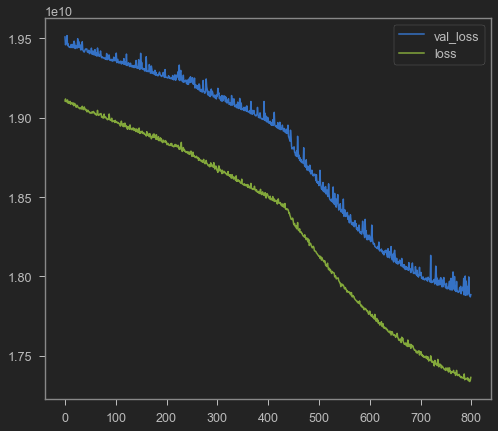

In [38]:
loss.plot()

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [40]:
predictions = model.predict(X_test)

In [41]:
mean_absolute_error(y_test,predictions)

91575.85641872065

In [42]:
np.sqrt(mean_squared_error(y_test,predictions))

133735.8604007968

In [43]:
explained_variance_score(y_test,predictions)

0.7627348451029372

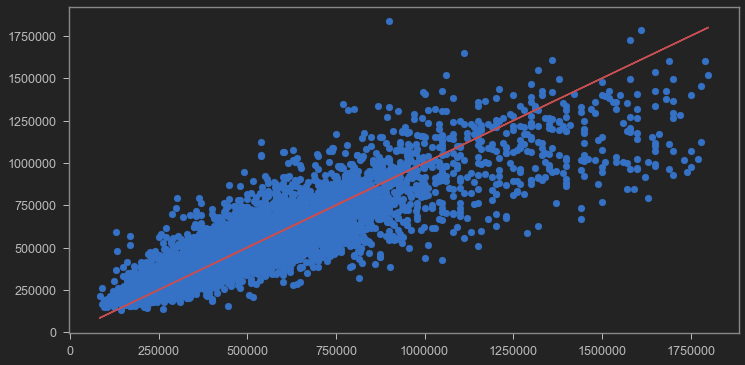

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')